# Answer the F Question

## 1. 导入所需要的库

In [1]:
# 基本库
import os
import datetime
import time

# 数据读取
import pandas as pd
import numpy as np

# 可视化
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import cm

# 操作Excel表格
# 只用读取即可。
import xlrd



# import tensorflow as tf

# import dgl

## 2 定义公共函数

输出信息

In [2]:
def DisplayStartInfo():
    """
    :description: 显示开始时间。
    :param None {type: None}: 
    :return startTime {type: datetime.datetime}{count: 1}: 返回当前时间。
    """
    print("-------------------------Start-------------------------")
    startTime = datetime.datetime.now()
    print(startTime.strftime('%Y-%m-%d %H:%M:%S'))
    return startTime


def DisplayCompletedInfo(startTime=datetime.datetime.now(), isDisplayTimeConsumed=False):
    """
    :description: 显示结束时间信息。
    :param startTime {type: datetime.datetime} {default: datetime.datetime.now()}:: 显示开始时间。default值搭配着isDisplayTimeConsumed=False一起使用，这个时候可以不输出消耗时间。
    :param isDisplayTimeConsumed {type: bool} {default: False}: 是否显示消耗的时间，默认值不显示。
    :return None {count: 0}: 
    """
    if isDisplayTimeConsumed==True:
        print('Time consumed:', str(datetime.datetime.now() - startTime).split('.')[0])
    print("Completed at " + time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) + ".\n")
    print("-------------------------Completed-------------------------")

def DisplaySeparator():
    print("---------------------------------------------------------\n")

可视化设置

In [3]:
# 设置字体
# STFANGSO.TTF字体需要拷贝。在没有STFANGSO.TTF的情况下，可以使用windows默认字体simsun.ttc。
myFont = fm.FontProperties(fname='c:\windows\Fonts\STFANGSO.TTF')
# myFont = fm.FontProperties(fname='c:\windows\Fonts\simsun.ttc')

# 设置图像大小
figSizeNormal = (5, 3.09)
figSizeHuge = (8, 8)


def setRainbowColors(valueList):
    """_summary_ 设置饼图的彩虹色

    Args:
        valueList (list): 输入值的列表。

    Returns:
        list: 彩虹色的列表。
    """
    return cm.rainbow_r(np.arange(len(valueList))/len(valueList))

def make_autopct(values_list):
    def my_autopct(pct):
        total = sum(values_list)
        val = int(round(pct*total)/100.0)
        return '{p:1.1f}% ({v:d}人)'.format(p=pct, v=val)
    return my_autopct

# 首先计算百分比
def calculatePercentage(inputList):
    percentageList = []
    total = sum(inputList)
    for temp in inputList:
        percentageList.append(round((temp/total * 100.0),1))
    return percentageList

生成单个柱状图

In [4]:

def drawingSingBar(data_df, title, x_column_name, y_column_name, 
                   xlabel, ylabel, label_name, path, imageSize=(6, 6), ShowEnable=True):
    """_summary_ 绘制单个柱状图。

    Args:
        data_df (Pandas.Dateframe): 包含显示信息的Dataframe数据集。
        title (string): 图的名称。
        x_column_name (string): x轴在数据集中的列名。
        y_column_name (string): y轴在数据集中的列名。
        xlabel (string): x轴标签名。
        ylabel (string): y轴标签名。
        label_name (string): 图例的名称。
        path (string): 保存路径。
        imageSize (tuple, optional): 图片整体大小. Defaults to (6, 6).
        ShowEnable (boolean, optional): 图片是否显示在jupyter中。
                                        如果false就只保存，不展示结果。Defaults to True.
    """
    x = data_df[x_column_name]
    y = data_df[y_column_name]
    fig = plt.figure(figsize=imageSize, dpi=80)
    ax = fig.add_subplot(111)
    ax.plot(x, y, label=label_name)
    tick_spacing = 180
    plt.xticks(rotation=45)
    plt.xlabel(xlabel, fontproperties=myFont)
    plt.ylabel(ylabel, fontproperties=myFont)
    plt.title(title)
    plt.grid(alpha=0.4)
    plt.legend(prop=myFont, loc='upper left')
    plt.savefig(path)
    if ShowEnable == True:
        plt.show()
    plt.clf()
    plt.close()

## 3. 数据读取及数据预处理

将所有excel中的数据按日期读取出来，并统一建议按种类分布的表。

## 3.1 文件批量改名

|编号|数据名称|重命名英文名称|说明|
|---|---|---|---|
|1|附件1：长春市COVID-19疫情期间病毒感染人数数据-新增本土感染者|1nlip|1New Local Infected Persons|
|2|附件1：长春市COVID-19疫情期间病毒感染人数数据-新增无症状感染者|1nai|1New Asymptomatic Infections|
|3|附表2：长春市9个区隔离人口数量与生活物资投放点数量|2pndpl|2Population and Number of Distribution Points of LivingMaterials|
|4|交通路口节点数据|3tind|Traffic intersection node data|
|5|交通路口路线数据|3tird|Traffic intersection route data|
|6|各区主要小区数据|3dmced|Data of main communities in each district|
|7|附件3/1.XX月XX日长春市重点民生商品供应情况表(0316模板）|31sklc|Supply of Key Livelihood Commodities|
|8|附件3/2.长春市生活物资保障体系基本情况表|32bilmss|Basic Information of Living Material Support System|
|9|附件3/3.XX月XX日长春市主要粮油副食品零售价格监测表|33rpmconsf|Monitoring Table for Retail Price of Major Cereals, Oils and Non staple Foods|
|10|附件3/4.XX月XX日长春市重点蔬菜零售价格监测表|34rpkv|Monitoring Table for Retail Price of Key Vegetables|
|11|附件3/5.点调重点企业主要生活必需品价格情况表|35pmnke|Price of main necessities of key enterprises|
|12|附件3/|||
|13||||
|14||||
|15||||
|16||||
|||||
|||||
|||||

1. “4月29日”是一个关键节点，同名的文件夹有2个数据。一份是正常的日报；另一份是复工情况报告，这一份重名为“4月29日fg”。
2. 一共有352个xls/xlsx文件。
3. 重点民生商品供应情况表共计57个。
4. 重点民生商品供应情况表 中定义列数有28列。定义行数为65行（也就是65天排除了4月29日fg这个文件夹）。
   1. 列名
      |编号|名称|英文|说明|
      |---|---|---|---|
      |1|粮食总储备量|gtr|Total grain reserves|
      |2|粮食政府储备|ggr|Grain government reserves|
      |3|粮食重点企业库存|gike|Inventory of key grain enterprises可以为空|
      |4|粮食日出库量|gdo|Daily grain output|
      |5|粮食日进货量|gdp|Daily grain purchase|
      |6|粮食保障天数|gsd|Grain security days|
      |7|粮食储备标准|grs|Grain reserve standard|
      |8|食用油总储备量|otr|Oil|
      |9|食用油政府储备|ogr||
      |10|食用油重点企业库存|oike|可以为空|
      |11|食用油日出库量|odo||
      |12|食用油日进货量|odp||
      |13|食用油保障天数|osd||
      |14|食用油储备标准|ors||
      |15|猪肉总储备量|ptr|pork|
      |16|猪肉政府储备|pgr||
      |17|猪肉重点企业库存|pike|可以为空|
      |18|猪肉日出库量|pdo||
      |19|猪肉日进货量|pdp||
      |20|猪肉保障天数|psd||
      |21|猪肉储备标准|prs||
      |22|蔬菜总储备量|vtr|vegatable|
      |23|蔬菜政府储备|vgr||
      |24|蔬菜重点企业库存|vike|可以为空|
      |25|蔬菜日出库量|vdo||
      |26|蔬菜日进货量|vdp||
      |27|蔬菜保障天数|vsd||
      |28|蔬菜储备标准|vrs||
   2. 行名：从'3月18日'开始，到'5月23日'结束。共65天，注意数据5月21日和5月22日缺失。。


生成列名列表。

In [5]:
sklcColoumnNameList = ['gtr', 'ggr', 'gike', 'gdo', 'gdp', 'gsd', 'grs', 
                       'otr', 'ogr', 'oike', 'odo', 'odp', 'osd', 'ors', 
                       'ptr', 'pgr', 'pike', 'pdo', 'pdp', 'psd', 'prs', 
                       'vtr', 'vgr', 'vike', 'vdo', 'vdp', 'vsd', 'vrs']
sklcColoumnCNNameList = ['粮食总储备量', '粮食政府储备', '粮食重点企业库存', '粮食日出库量', '粮食日进货量', '粮食保障天数', '粮食储备标准', 
                        '食用油总储备量', '食用油政府储备', '食用油重点企业库存', '食用油日出库量', '食用油日进货量', '食用油保障天数', '食用油储备标准',
                       '猪肉总储备量', '猪肉政府储备', '猪肉重点企业库存', '猪肉日出库量', '猪肉日进货量', '猪肉保障天数', '猪肉储备标准',
                       '蔬菜总储备量', '蔬菜政府储备', '蔬菜重点企业库存', '蔬菜日出库量', '蔬菜日进货量', '蔬菜保障天数', '蔬菜储备标准',]

生成日期组成的列表。参考<https://www.cnblogs.com/cupleo/p/16290049.html>

In [6]:
def createDateList(startTime=None, endTime=None):
    """_summary_
    行名：从'3月18日'开始，到'5月23日'结束。共65天。注意数据5月21日和5月22日缺失。
    Args:
        startTime (str): 开始日期。只能是"2022-03-02"这种格式。
        endTime (str): 开始日期。只能是"2022-03-02"这种格式。

    Returns:
        list: 由日期字符串组成的列表。
    """
    
    if startTime is None:
        startTime = '2022-10-01'
    if endTime is None:
        endTime = datetime.datetime.now().strftime('%Y-%m-%d')
    
    startTime=datetime.datetime.strptime(startTime,'%Y-%m-%d')
    endTime=datetime.datetime.strptime(endTime,'%Y-%m-%d')
    
    date_list = []
    date_list.append(startTime.strftime('%Y-%m-%d'))
    while startTime < endTime:
        # 日期叠加一天
        startTime += datetime.timedelta(days=+1)
        # 日期转字符串存入列表
        date_list.append(startTime.strftime('%Y-%m-%d'))
    
    return date_list

sklcRowNameList = createDateList("2022-03-18", "2022-05-23")
print(sklcRowNameList)
print(len(sklcRowNameList))

['2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22', '2022-05-23']
67


1. 遍历文件参考:
    1. <https://blog.csdn.net/weixin_43115411/article/details/126049598>
    2. 清晰的说明。<http://coolpython.net/python_senior/pytip/iter_folder.html>
2. 复制文件参考<https://blog.csdn.net/m0_52650621/article/details/113405008>。使用shutil来对文件进行复制及重命名。
3. 对excel进行操作。<https://blog.csdn.net/qdPython/article/details/125603938>
4. python中os.path.join()函数：连接两个或更多的路径名函数。<https://blog.csdn.net/qq_40212975/article/details/108863273>
5. 获取文件后缀名，用第一个方法即可。非常好用。<https://blog.csdn.net/weixin_40895135/article/details/121033002>
6. 判断一个字符串中是否包含另一个字符串<https://jingyan.baidu.com/article/0964eca20d1bddc385f536db.html>
7. python的绝对时间起点和excel的绝对时间起点不一样。说明<https://zhuanlan.zhihu.com/p/143520836>。excel读到的日期的浮点数，代表的是自1900年1月1日以来的天数。python的时间戳是指格林威治时间自1970年1月1日至当前时间的总秒数。代码实现<https://blog.csdn.net/qq_42479394/article/details/116332683>。

In [7]:
# x = "政府储备已到期"
# y = "天地源米业740"
# z = [i for i in y if str.isdigit(i)]
# w = [i for i in x if str.isdigit(i)]
# print(w)
# s = "".join(z)
# print(int(s))

def GetExcelCellStringtoNumber(cell):
    """_summary_
    这个函数有问题，对小数没法处理。
    Args:
        cell (object): 可以是字符串、整型、浮点型。然后全部统一转换为浮点型。
                        将excel的cell中的数值提取出来。然后转化为浮点型输出。
                        对于"政府储备已到期"也可以理解为储备为0了。

    Returns:
        float: 输出一个浮点型数值，如果表格中这里是空的，那么返回0。
    """
    typecell = type(cell)
    # print(typecell)
    # print(type(typecell))
    if typecell == float or typecell == int:
        return cell

    isNumber = [i for i in cell if str.isdigit(i)]
    if len(isNumber) == 0:
        return 0
    
    strNumber = "".join(isNumber)
    return float(strNumber)

# rr = GetExcelCellStringtoNumber(y)

# print(type(rr))
# print(rr)


In [8]:
from xlrd import xldate_as_datetime

Appendix3Path = r"./data/附件4：长春市疫情期间每日生活物资相关数据/"

# 重点民生商品供应情况表 中定义列数有28列。定义行数为65行（也就是65天排除了4月29日fg这个文件夹），
# 注意数据5月21日和5月22日缺失。。
SklcPD = pd.DataFrame(index=sklcRowNameList, columns=sklcColoumnNameList)

totalExcelFilesNumber = 0
totalSklcFilesNumber = 0

for dirpath, dirnames, filenames in os.walk(Appendix3Path):
    for filename in filenames:
        temp = os.path.join(dirpath, filename)
        # print(temp)
        # print(type(temp))
        # print(temp[-4:])
        
        Suffix = os.path.splitext(temp)[-1]
        # print(Suffix)
        if Suffix == ".xls" or Suffix == ".xlsx":
            # print(temp)
            # 重点民生商品供应情况表(0316模板）  这个字符串太紧了，将3月20日等几天的剔除了。
            # 1.3月31日长春市重点民生商品供应情况表(0316模板）
            if '重点民生商品供应情况表' in temp:
                # print(temp)
                workbook = xlrd.open_workbook(temp)
                table = workbook.sheets()[0]

                rown = 6
                coln = 3

                cell = table.cell_value(rown - 1, coln - 1)
                # 将excel的时间转化为python的时间。xldate_as_datetime()返回的类型已经是字符串类型了。
                # print(xldate_as_datetime(cell, 0).strftime("%Y-%m-%d"))
                time = table.cell_value(3 - 1, 1 - 1)
                tableTime = xldate_as_datetime(time, 0).strftime("%Y-%m-%d")
                # print(type(tableTime))
                # print(tableTime)
                # SklcPD.loc[tableTime,'gtr'] = cell
                
                # 'gtr', 'ggr', 'gike', 'gdo', 'gdp', 'gsd', 'grs', 
                # 先将结果全部填进DataFrame里面，然后在统一修改类型和数值，并且去除杂质。
                SklcPD.loc[tableTime,'gtr'] = GetExcelCellStringtoNumber(table.cell_value(6 - 1, 3 - 1))
                SklcPD.loc[tableTime,'ggr'] = GetExcelCellStringtoNumber(table.cell_value(6 - 1, 4 - 1))
                gike1 = GetExcelCellStringtoNumber(table.cell_value(6 - 1, 5 - 1))
                gike2 = GetExcelCellStringtoNumber(table.cell_value(6 - 1, 6 - 1))
                gike3 = GetExcelCellStringtoNumber(table.cell_value(6 - 1, 7 - 1))
                SklcPD.loc[tableTime,'gike'] = gike1 + gike2 + gike3
                SklcPD.loc[tableTime,'gdo'] = GetExcelCellStringtoNumber(table.cell_value(6 - 1, 9 - 1))
                SklcPD.loc[tableTime,'gdp'] = GetExcelCellStringtoNumber(table.cell_value(6 - 1, 10 - 1))
                SklcPD.loc[tableTime,'gsd'] = GetExcelCellStringtoNumber(table.cell_value(6 - 1, 11 - 1))
                SklcPD.loc[tableTime,'grs'] = GetExcelCellStringtoNumber(table.cell_value(6 - 1, 12 - 1))
                
                # 'otr', 'ogr', 'oike', 'odo', 'odp', 'osd', 'ors', 
                SklcPD.loc[tableTime,'otr'] = GetExcelCellStringtoNumber(table.cell_value(7 - 1, 3 - 1))
                SklcPD.loc[tableTime,'ogr'] = GetExcelCellStringtoNumber(table.cell_value(7 - 1, 4 - 1))
                oike1 = GetExcelCellStringtoNumber(table.cell_value(7 - 1, 5 - 1))
                oike2 = GetExcelCellStringtoNumber(table.cell_value(7 - 1, 6 - 1))
                oike3 = GetExcelCellStringtoNumber(table.cell_value(7 - 1, 7 - 1))
                SklcPD.loc[tableTime,'oike'] = oike1 + oike2 + oike3
                SklcPD.loc[tableTime,'odo'] = GetExcelCellStringtoNumber(table.cell_value(7 - 1, 9 - 1))
                SklcPD.loc[tableTime,'odp'] = GetExcelCellStringtoNumber(table.cell_value(7 - 1, 10 - 1))
                SklcPD.loc[tableTime,'osd'] = GetExcelCellStringtoNumber(table.cell_value(7 - 1, 11 - 1))
                SklcPD.loc[tableTime,'ors'] = GetExcelCellStringtoNumber(table.cell_value(7 - 1, 12 - 1))
                
                # 'ptr', 'pgr', 'pike', 'pdo', 'pdp', 'psd', 'prs', 
                SklcPD.loc[tableTime,'ptr'] = GetExcelCellStringtoNumber(table.cell_value(8 - 1, 3 - 1))
                SklcPD.loc[tableTime,'pgr'] = GetExcelCellStringtoNumber(table.cell_value(8 - 1, 4 - 1))
                pike1 = GetExcelCellStringtoNumber(table.cell_value(8 - 1, 5 - 1))
                pike2 = GetExcelCellStringtoNumber(table.cell_value(8 - 1, 6 - 1))
                pike3 = GetExcelCellStringtoNumber(table.cell_value(8 - 1, 7 - 1))
                SklcPD.loc[tableTime,'pike'] = pike1 + pike2 + pike3
                SklcPD.loc[tableTime,'pdo'] = GetExcelCellStringtoNumber(table.cell_value(8 - 1, 9 - 1))
                SklcPD.loc[tableTime,'pdp'] = GetExcelCellStringtoNumber(table.cell_value(8 - 1, 10 - 1))
                SklcPD.loc[tableTime,'psd'] = GetExcelCellStringtoNumber(table.cell_value(8 - 1, 11 - 1))
                SklcPD.loc[tableTime,'prs'] = GetExcelCellStringtoNumber(table.cell_value(8 - 1, 12 - 1))

                # 'vtr', 'vgr', 'vike', 'vdo', 'vdp', 'vsd', 'vrs'
                SklcPD.loc[tableTime,'vtr'] = GetExcelCellStringtoNumber(table.cell_value(9 - 1, 3 - 1))
                SklcPD.loc[tableTime,'vgr'] = GetExcelCellStringtoNumber(table.cell_value(9 - 1, 4 - 1))
                vike1 = GetExcelCellStringtoNumber(table.cell_value(9 - 1, 5 - 1))
                vike2 = GetExcelCellStringtoNumber(table.cell_value(9 - 1, 6 - 1))
                vike3 = GetExcelCellStringtoNumber(table.cell_value(9 - 1, 7 - 1))
                SklcPD.loc[tableTime,'vike'] = vike1 + vike2 + vike3
                SklcPD.loc[tableTime,'vdo'] = GetExcelCellStringtoNumber(table.cell_value(9 - 1, 9 - 1))
                SklcPD.loc[tableTime,'vdp'] = GetExcelCellStringtoNumber(table.cell_value(9 - 1, 10 - 1))
                SklcPD.loc[tableTime,'vsd'] = GetExcelCellStringtoNumber(table.cell_value(9 - 1, 11 - 1))
                SklcPD.loc[tableTime,'vrs'] = GetExcelCellStringtoNumber(table.cell_value(9 - 1, 12 - 1))
                
                # print(cell)
                
                totalSklcFilesNumber += 1
            totalExcelFilesNumber += 1

print("totalExcelFilesNumber is {}. totalSklcFilesNumber is {}".format(totalExcelFilesNumber, 
                                                                       totalSklcFilesNumber))


totalExcelFilesNumber is 352. totalSklcFilesNumber is 57


In [9]:
SklcPD.to_csv("./data/TempSklc.csv")
SklcPD

,gtr,ggr,gike,gdo,gdp,gsd,grs,otr,ogr,oike,...,pdp,psd,prs,vtr,vgr,vike,vdo,vdp,vsd,vrs
2022-03-18,30179.0,15000.0,12800.0,152.0,82.0,21.0,15.0,4670.0,1800.0,2500.0,...,130.0,13.0,3.0,16679.0,10000.0,6610.0,1714.0,1400.0,7.0,7.0
2022-03-19,30123.0,15000.0,12700.0,128.0,47.0,21.0,15.0,4824.0,1800.0,2600.0,...,185.0,13.0,3.0,16337.0,10000.0,6320.0,1668.0,1237.0,7.0,7.0
2022-03-20,29982.0,15000.0,12700.0,238.0,73.0,21.0,15.0,4750.0,1800.0,2500.0,...,148.0,13.0,3.0,15889.0,10000.0,6150.0,1498.0,1126.0,7.0,7.0
2022-03-21,29935.0,15000.0,12700.0,130.0,69.0,20.0,15.0,4747.0,1800.0,2500.0,...,119.0,13.0,3.0,15521.0,10000.0,5770.0,1544.0,973.0,7.0,7.0
2022-03-22,29942.0,15000.0,12700.0,65.0,69.0,20.0,15.0,4744.0,1800.0,2500.0,...,119.0,13.0,3.0,15158.0,10000.0,6590.0,1443.0,956.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
SklcPD_FillNan = SklcPD.fillna(0)
SklcPD_FillNan.describe()

,gtr,ggr,gike,gdo,gdp,gsd,grs,otr,ogr,oike,...,pdp,psd,prs,vtr,vgr,vike,vdo,vdp,vsd,vrs
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,6.700000e+01,67.000000,67.000000,67.000000,67.000000,67.000000
mean,15363.507463,12313.432836,2234.865672,147.641791,127.731343,10.552239,12.313433,2702.432836,1477.611940,611.985075,...,164.268657,9.358209,2.462687,3650.119403,2.120236e+06,1382.223881,938.567164,899.000000,1.970149,5.746269
std,8259.864069,5795.005570,3638.706900,106.927007,118.127894,5.668316,5.795006,1404.467571,695.400668,766.436905,...,103.462273,4.464342,1.159001,4316.588950,1.217401e+07,1875.023667,859.248865,866.465635,1.922515,2.704336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16706.500000,15000.000000,1200.000000,63.000000,9.000000,11.000000,15.000000,2649.000000,1800.000000,150.000000,...,115.500000,11.000000,3.000000,1444.000000,0.000000e+00,600.000000,384.000000,374.000000,1.000000,7.000000
50%,16867.000000,15000.000000,1200.000000,149.000000,85.000000,12.000000,15.000000,2938.000000,1800.000000,150.000000,...,185.000000,11.000000,3.000000,2658.000000,0.000000e+00,777.000000,685.000000,684.000000,2.000000,7.000000
75%,17273.500000,15000.000000,1218.000000,224.000000,222.000000,12.000000,15.000000,3479.500000,1800.000000,890.000000,...,218.000000,12.000000,3.000000,3692.500000,0.000000e+00,1092.000000,1426.000000,1129.000000,2.000000,7.000000
max,30796.000000,15000.000000,12800.000000,514.000000,389.000000,21.000000,15.000000,4824.000000,1800.000000,2600.000000,...,436.000000,13.000000,3.000000,16679.000000,7.100290e+07,7100.000000,3535.000000,3580.000000,7.000000,7.000000


In [11]:
SklcPD_FillNan['date'] = SklcPD_FillNan.index
SklcPD_FillNan

,gtr,ggr,gike,gdo,gdp,gsd,grs,otr,ogr,oike,...,psd,prs,vtr,vgr,vike,vdo,vdp,vsd,vrs,date
2022-03-18,30179.0,15000.0,12800.0,152.0,82.0,21.0,15.0,4670.0,1800.0,2500.0,...,13.0,3.0,16679.0,10000.0,6610.0,1714.0,1400.0,7.0,7.0,2022-03-18
2022-03-19,30123.0,15000.0,12700.0,128.0,47.0,21.0,15.0,4824.0,1800.0,2600.0,...,13.0,3.0,16337.0,10000.0,6320.0,1668.0,1237.0,7.0,7.0,2022-03-19
2022-03-20,29982.0,15000.0,12700.0,238.0,73.0,21.0,15.0,4750.0,1800.0,2500.0,...,13.0,3.0,15889.0,10000.0,6150.0,1498.0,1126.0,7.0,7.0,2022-03-20
2022-03-21,29935.0,15000.0,12700.0,130.0,69.0,20.0,15.0,4747.0,1800.0,2500.0,...,13.0,3.0,15521.0,10000.0,5770.0,1544.0,973.0,7.0,7.0,2022-03-21
2022-03-22,29942.0,15000.0,12700.0,65.0,69.0,20.0,15.0,4744.0,1800.0,2500.0,...,13.0,3.0,15158.0,10000.0,6590.0,1443.0,956.0,7.0,7.0,2022-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-05-19
2022-05-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-05-20
2022-05-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-05-21
2022-05-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-05-22


将《重点民生商品供应情况表》可视化

将一个dataframe中指定的列都画图。

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
# sklcColoumnCNNameList
def DrawDataFrameSelectColums(data_df, x_column_name, y_columns_name, 
                              xlabel, ylabels, label_names, savePath, y_columns_CN_name=None,
                              prefix=None, imageSize=(20, 12), titles=None):
    """_summary_
    对一个dataframe中指定的多个列绘制多张图。
    注意输入的列表参数的长度要完全一样。
    Args:
        data_df (DataFrame): 数据集。
        x_column_name (string): 指定的x轴在数据集中的列名。
        y_columns_name (list, string): 指定的y轴在数据集中的列名列表。
        xlabel (string): x轴标签。
        ylabels (list, string): y轴标签列表。
        label_names (list, string): 图例名列表。
        savePath (string): 保存的文件夹路径。
        y_columns_CN_name=None (string, optional): 对应的中文列名，用于图片展示用。Default is None.
        prefix=None (string, optional): 需要展示图片名称时共同的前缀。Default is None.
        imageSize=None (tuple, optional): 图片大小。Default is (20, 12).
        titles (list, string, optional): 图片名称列表，这个应用场景中是组合而成的。Default is None.
    """
    
    if len(y_columns_name) != len(ylabels) or len(y_columns_name) != len(label_names):
        
        print("DrawDataFrameSelectColums() input params length ERROR! {} {} {}".format(len(y_columns_name), len(ylabels), len(label_names)))
        return 
    
    if titles == None :
        for y_column_name, ylabel, label_name, cn_label_name in zip(y_columns_name, ylabels, label_names, y_columns_CN_name):
            # 将列名和文件夹路径组合成完整路径。
            # print(ylabel, y_column_name)
            # print(SklcPD_FillNan[y_column_name])
            saveImagePath = os.path.join(savePath, ylabel + ".png")
            title = prefix + "-" + cn_label_name
            drawingSingBar(SklcPD_FillNan, title, 'date', y_column_name, 
                xlabel, cn_label_name, cn_label_name, saveImagePath, imageSize, False)
    else:
        for title, y_column_name, ylabel, label_name, cn_label_name in zip(titles, y_columns_name, ylabels, label_names, y_columns_CN_name):
            # 将列名和文件夹路径组合成完整路径。
            saveImagePath = os.path.join(savePath, ylabel + ".png")
            drawingSingBar(SklcPD_FillNan, title, 'date', y_column_name, 
                xlabel, cn_label_name, cn_label_name, saveImagePath, imageSize, False)
    print("DrawDataFrameSelectColums() has completed.")

In [13]:
DrawDataFrameSelectColums(SklcPD_FillNan, 'date', sklcColoumnNameList, "日期", sklcColoumnCNNameList, 
                          sklcColoumnCNNameList, "./pictures/", sklcColoumnCNNameList, "重点民生商品")

# saveImagePath = os.path.join("./pictures/" , "gtr" + ".png")
# drawingSingBar(SklcPD_FillNan, "重点民生商品-粮食总储备量",'date', 'gtr', 
#                "日期", "粮食总储备量", "粮食总储备量", "./pictures/gtr.png", (20, 12), False)

# drawingSingBar(SklcPD_FillNan, "重点民生商品-政府储备",'date', 'ggr', 
#                "日期", "政府储备", "政府储备","./pictures/ggr.png", (20, 12), False)

# drawingSingBar(SklcPD_FillNan, "重点民生商品-重点企业库存",'date', 'gike', 
#                "日期", "重点企业库存", "重点企业库存","./pictures/gike.png", (20, 12), False)




DrawDataFrameSelectColums() has completed.


读取附件5中的《蔬菜包》数据

首先读取总体情况。按照每个区的每天要统计一个；总的也要统计一个。

1. 列名定义：是下面的组合而成。
    |编号|名称|英文|说明|
    |---|---|---|---|
    |1|朝阳区|cy|/|
    |2|南关区|ng|/|
    |3|二道区|ed|/|
    |4|宽城区|kc|/|
    |5|绿园区|lv|/|
    |6|长春新区|ccx|/|
    |7|经开区|jk|/|
    |8|净月区|jy|/|
    |9|汽开区|qk|/|
    |10|莲花山|lhs|/|
    |11|中韩示范区|zhsf|/|
    |12|九台区|jt|/|
    |13|市州支援|szzy|/|
    |14|包保单位|bbdw|/|
    |15|蔬菜包|scb|/|
    |16|蔬菜总量|sczl|/|
    |17|接收|js|/|
    |18|发放|ff|/|
    |19|市级直采|sjzc|/|
    |20|属地自保|sdzb|/|
    |21|合计|hj|/|
    |22|自采|zc|/|
    |23|接收+自采|jszc|/|
    |24|全城|all|/|


In [14]:
scbRowNameList = createDateList("2022-03-26", "2022-05-01")
print(scbRowNameList)
print(len(scbRowNameList))

['2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01']
37


In [15]:
VegatableColumnNameList = ['szzybbdw', 'szzyjsscb', 'szzyjssczl', 'szzyffscb', 'szzyffsczl',
                           'sjzcjsscb', 'sjzcjssczl', 'sjzcffscb', 'sjzcffsczl', 
                           'sdzbzcscb', 'sdzbzcsczl', 'sdzbffscb', 'sdzbffsczl',
                           'hjjszcscb', 'hjjszcsczl', 'hjffscb', 'hjffsczl']

In [16]:
cyVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)
ngVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)
edVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)
kcVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)
lvVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)
ccxVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)
jkVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)
jyVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)
qkVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)
lhsVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)
zhsfVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)
jtVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)
allVegatable = pd.DataFrame(index=scbRowNameList, columns=VegatableColumnNameList)

In [76]:

def get0410to0429AllVegatableData(table, inputDataframe):
    # 获取日期。
    time = table.cell_value(3 - 1, 16 - 1)

    tableTime = datetime.datetime.strptime("2022年" + time[5:10], "%Y年%m月%d日").strftime("%Y-%m-%d")
    # print(tableTime)

    # 获取excel表格中第一列中"合计"的行号。
    getRowNumber = table.col_values(0).index('合计')
    # print(getRowNumber)

    allVegatable.loc[tableTime,'szzyjsscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 4 - 1))
    allVegatable.loc[tableTime,'szzyjssczl'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 5 - 1))
    allVegatable.loc[tableTime,'szzyffscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 6 - 1))
    allVegatable.loc[tableTime,'szzyffsczl'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 7 - 1))
    
    allVegatable.loc[tableTime,'sjzcjsscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 8 - 1))
    # print(GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 8 - 1)))
    allVegatable.loc[tableTime,'sjzcjssczl'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 9 - 1))
    allVegatable.loc[tableTime,'sjzcffscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 10 - 1))
    allVegatable.loc[tableTime,'sjzcffsczl'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 11 - 1))
    
    allVegatable.loc[tableTime,'sdzbzcscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 12 - 1))
    allVegatable.loc[tableTime,'sdzbzcsczl'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 13 - 1))
    allVegatable.loc[tableTime,'sdzbffscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 14 - 1))
    allVegatable.loc[tableTime,'sdzbffsczl'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 15 - 1))
    
    allVegatable.loc[tableTime,'hjjszcscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 16 - 1))
    allVegatable.loc[tableTime,'hjjszcsczl'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 17 - 1))
    allVegatable.loc[tableTime,'hjffscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 18 - 1))
    allVegatable.loc[tableTime,'hjffsczl'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 19 - 1))
       

In [75]:
def get0329AllVegatableData(table, inputDataframe):
    # 获取日期。
    time = table.cell_value(3 - 1, 1 - 1)
    tableTime = datetime.datetime.strptime("2022年" + time[6:11], "%Y年%m月%d日").strftime("%Y-%m-%d")
    print(tableTime)
    
    getRowNumber = table.col_values(0).index('合计')
    print(getRowNumber)
    # 将“接收车数量（辆）”丢弃。因为就只有少量的表有。
    # “对接情况”和“市州支援”匹配。4,5
    # 放弃“属地自保”。
    # “蔬菜包投放总量（对接+自采）”和“合计接收+自采蔬菜包”匹配。
    # “已发放量（袋）”和“合计发放蔬菜包”匹配。6
    allVegatable.loc[tableTime,'szzyjsscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 4 - 1))
    print(GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 4 - 1)))
    allVegatable.loc[tableTime,'szzyjssczl'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 5 - 1))

    allVegatable.loc[tableTime,'sjzcjsscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 7 - 1))
    allVegatable.loc[tableTime,'sjzcjssczl'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 8 - 1))

    allVegatable.loc[tableTime,'hjjszcscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 10 - 1))
    allVegatable.loc[tableTime,'hjffscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 6 - 1))


In [113]:
def get03260327AllVegatableData(table, inputDataframe):
    # completed.
    # 只有接收蔬菜包。
    getRowNumber = table.col_values(0).index('总计')
    # print(getRowNumber)
    
    time = table.cell_value(getRowNumber + 1, 1 - 1)
    # print(time[5:10])
    tableTime = datetime.datetime.strptime("2022年" + time[5:10], "%Y年%m月%d日").strftime("%Y-%m-%d")
    # print(tableTime)

    allVegatable.loc[tableTime,'hjjszcscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 3 - 1))
    # print(GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 3 - 1)))

In [115]:
# xlrd不能读取xlsx文件。<https://www.cnblogs.com/hls-code/p/15715697.html>

def get0328AllVegatableData(table, inputDataframe):
    
    time = table.cell_value(3 - 1, 2 - 1)
    # print(time[6:11])
    tableTime = datetime.datetime.strptime("2022年" + time[6:11], "%Y年%m月%d日").strftime("%Y-%m-%d")
    print(tableTime)

    getRowNumber = table.col_values(2).index('合计')
    print(getRowNumber)
    
    allVegatable.loc[tableTime,'hjjszcscb'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 6 - 1))
    allVegatable.loc[tableTime,'hjjszcsczl'] = GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 7 - 1))
    # print(GetExcelCellStringtoNumber(table.cell_value(getRowNumber, 3 - 1)))

In [132]:
# 先取合计部分的数值。
def get0330AllVegatableData():
    pass

def get03310401AllVegatableData():
    pass


Appendix5Path = r"./data/附件5：长春市疫情期间每日各区蔬菜包相关数据/"

totalExcelFilesNumber = 0
totalAllVegatableFilesNumber = 0
for dirpath, dirnames, filenames in os.walk(Appendix5Path):
    for filename in filenames:
        temp = os.path.join(dirpath, filename)

        Suffix = os.path.splitext(temp)[-1]
        # print(Suffix)
        if Suffix == ".xls" or Suffix == ".xlsx":
            # 先处理标准格式的。然后再处理不标准格式的。
            # 长春各区行政保供蔬菜包情况表 (0-24时)
            # 长春各区行政保供蔬菜包情况表
            totalExcelFilesNumber += 1
            # print(totalExcelFilesNumber)
            if '328各地蔬菜包对接表' in temp:
                workbook = xlrd.open_workbook(temp)
                table = workbook.sheets()[0]
                
                get0328AllVegatableData(table, allVegatable)
                totalAllVegatableFilesNumber += 1
                pass
            
            if '各区3月' in temp :
                # 3月26日和2月27日
                workbook = xlrd.open_workbook(temp)
                table = workbook.sheets()[0]

                # get03260327AllVegatableData(table, allVegatable)
                totalAllVegatableFilesNumber += 1
            
            if '3.29日表2' in temp:
                workbook = xlrd.open_workbook(temp)
                table = workbook.sheets()[0]
                
                # get0329AllVegatableData(table, allVegatable)
                totalAllVegatableFilesNumber += 1
            
            if '长春各区行政保供蔬菜包情况表 (0-24时)' in temp:
                # print(temp)
                workbook = xlrd.open_workbook(temp)
                table = workbook.sheets()[0]
                
                # get0410to0429AllVegatableData(table, allVegatable)
                
                totalAllVegatableFilesNumber += 1
print("totalExcelFilesNumber is {}. totalAllVegatableFilesNumber is {}".format(totalExcelFilesNumber, 
                                                                       totalAllVegatableFilesNumber))            


allVegatable.loc['2022-03-30', 'hjjszcscb'] = 211170.0
allVegatable.loc['2022-03-31', 'hjjszcscb'] = 189404.0
allVegatable.loc['2022-04-01', 'hjjszcscb'] = 140480.0
allVegatable.loc['2022-04-02', 'hjjszcscb'] = 0
allVegatable.loc['2022-04-03', 'hjjszcscb'] = 0
allVegatable.loc['2022-04-04', 'hjjszcscb'] = 73895.0
allVegatable.loc['2022-04-05', 'hjjszcscb'] = 75212.0
allVegatable.loc['2022-04-06', 'hjjszcscb'] = 83720.0
allVegatable.loc['2022-04-07', 'hjjszcscb'] = 83827.0
allVegatable.loc['2022-04-08', 'hjjszcscb'] = 156813.0
allVegatable.loc['2022-04-09', 'hjjszcscb'] = 240625.0

allVegatable.loc['2022-04-30', 'hjjszcscb'] = 11600.0
allVegatable.loc['2022-05-01', 'hjjszcscb'] = 7100.0

2022-03-28
4
totalExcelFilesNumber is 37. totalAllVegatableFilesNumber is 24


In [133]:
allVegatable

,szzybbdw,szzyjsscb,szzyjssczl,szzyffscb,szzyffsczl,sjzcjsscb,sjzcjssczl,sjzcffscb,sjzcffsczl,sdzbzcscb,sdzbzcsczl,sdzbffscb,sdzbffsczl,hjjszcscb,hjjszcsczl,hjffscb,hjffsczl,date
2022-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20827.0,NaN,NaN,NaN,2022-03-26
2022-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74113.0,NaN,NaN,NaN,2022-03-27
2022-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139827.0,868.9,NaN,NaN,2022-03-28
2022-03-29,NaN,101208.0,976.9,NaN,NaN,112119.0,785.0,NaN,NaN,NaN,NaN,NaN,NaN,213327.0,NaN,69567.0,NaN,2022-03-29
2022-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211170.0,NaN,NaN,NaN,2022-03-30
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189404.0,NaN,NaN,NaN,2022-03-31
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140480.0,NaN,NaN,NaN,2022-04-01
2022-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2022-04-02
2022-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2022-04-03
2022-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73895.0,NaN,NaN,NaN,2022-04-04


In [134]:
allVegatable_fillNan = allVegatable.fillna(0)
allVegatable_fillNan['date'] = allVegatable_fillNan.index
allVegatable_fillNan.describe()

,szzybbdw,szzyjsscb,szzyjssczl,szzyffscb,szzyffsczl,sjzcjsscb,sjzcjssczl,sjzcffscb,sjzcffsczl,sdzbzcscb,sdzbzcsczl,sdzbffscb,sdzbffsczl,hjjszcscb,hjjszcsczl,hjffscb,hjffsczl
count,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.0,9941.216216,112.747568,6963.189189,80.466757,14725.405405,128.363946,11441.837838,100.484514,28537.162162,250.137905,26559.405405,234.730270,93977.108108,467.114284,46844.621622,415.681541
std,0.0,22604.088792,248.551414,12889.956943,156.846768,28501.781386,241.616244,20890.570727,180.787181,49749.790826,440.611967,43398.205014,385.384485,87816.853870,775.665749,69903.025428,645.471273
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27942.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,1992.000000,17.930000,0.000000,0.000000,8535.000000,80.180000,8067.000000,75.380000,73895.000000,182.710000,24266.000000,201.810000
75%,0.0,2000.000000,20.000000,6729.000000,77.400000,14048.000000,126.430000,13990.000000,125.910000,40297.000000,311.490000,39877.000000,306.760000,140480.000000,400.590000,56298.000000,453.330000
max,0.0,101208.000000,976.900000,42958.000000,539.200000,112119.000000,859.374000,86641.000000,768.090000,220773.000000,2009.870000,184315.000000,1697.120000,293518.000000,2820.604000,255462.000000,2403.600000


接收的蔬菜包（袋）数据

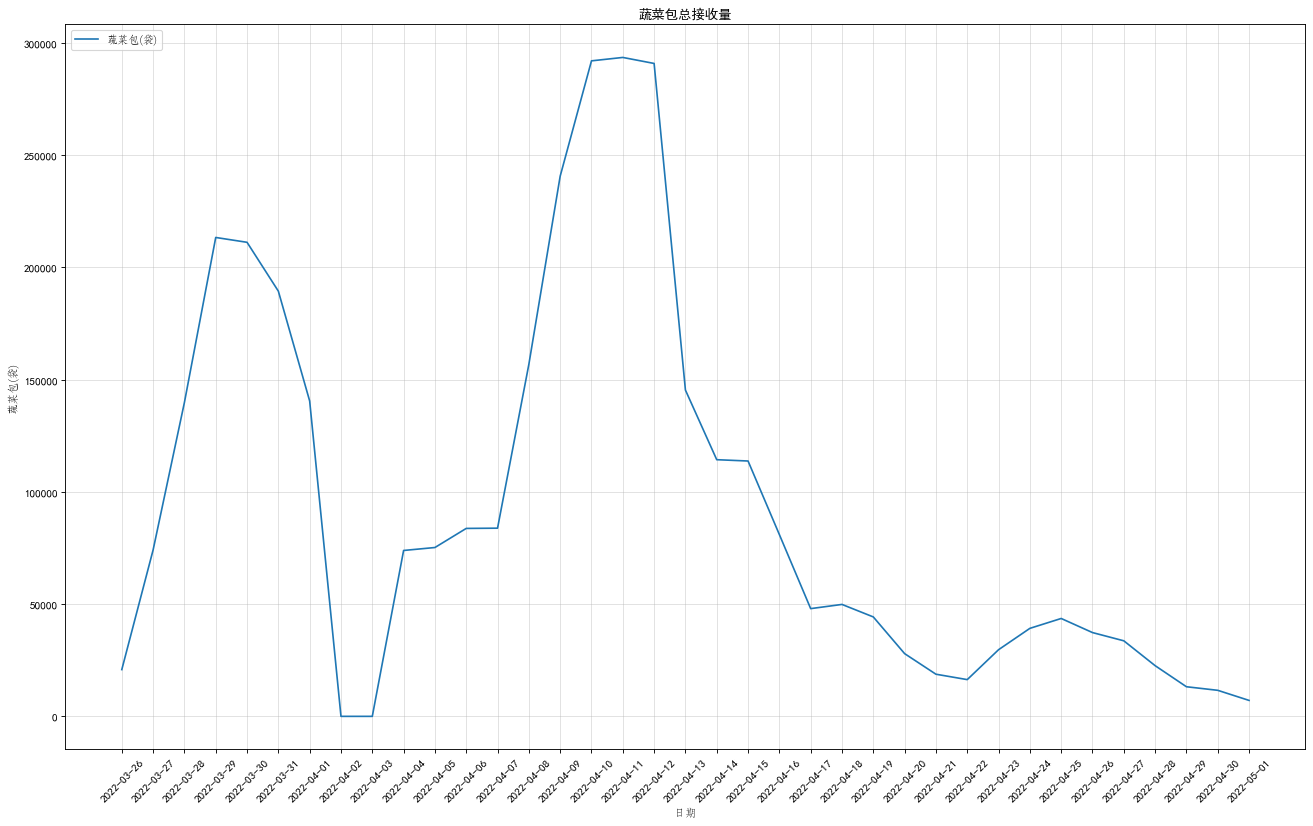

In [135]:
drawingSingBar(allVegatable_fillNan, "蔬菜包总接收量", 'date', 'hjjszcscb', 
                '日期', '蔬菜包(袋)', '蔬菜包(袋)', './pictures/蔬菜包总接收量.png', (20, 12))

读取疫情数据

In [ ]:
nai = pd.read_csv('./data/1nai.csv')
nalip = pd.read_csv('./data/1nalip.csv')



## 4. 建模

## 5. 可视化